In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA

In [3]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [4]:
oversample = SMOTE()

In [5]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
d  = np.array([0,1,2,3,4]).reshape(-1,1)
c  = np.array([360, 209, 68, 65, 18]).reshape(-1,1)
data = np.hstack([d,c])
df = pd.DataFrame(data = data, columns=['Dis','Freq'])
df

,Dis,Freq
0,0,360
1,1,209
2,2,68
3,3,65
4,4,18


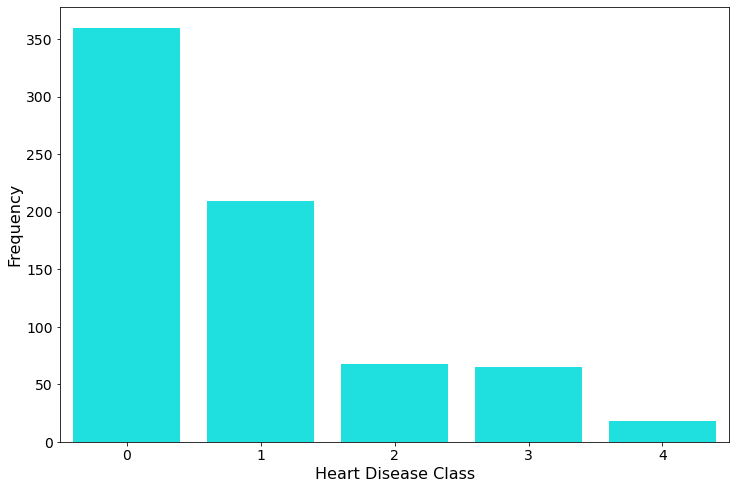

In [7]:
fig, axis = plt.subplots(1,1, figsize = (12,8))
sns.barplot(data = df, x = df.Dis, y = df.Freq, color = 'cyan', ax = axis)
axis.set_xlabel('Heart Disease Class', fontsize = 16)
axis.set_ylabel('Frequency', fontsize = 16)
axis.tick_params(axis='both',labelsize = 14)

In [8]:
number  = 13
transformer = FastICA(n_components = number, random_state = 144, whiten='unit-variance')
ICA_data = transformer.fit_transform(heart.drop(['num'],axis=1))

In [9]:
ICA_df = pd.DataFrame(data = transformer.components_.T, index = heart.drop(['num'],axis=1).columns, columns=['feature_'+str(i) for i in range(number)])
ICA_df.reset_index(inplace=True)

In [10]:
df = pd.DataFrame(data = np.hstack([ICA_data, heart.num.values.reshape(-1,1)]))
col_names = ['feature_'+str(i) for i in range(ICA_data.shape[1])] + ['Target']
df.columns = col_names

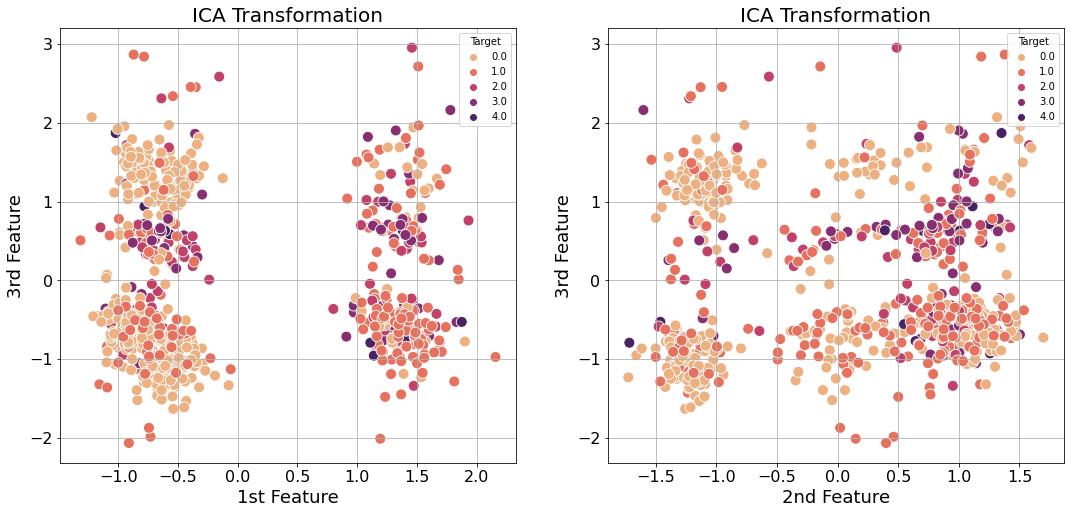

In [11]:
fig, axis = plt.subplots(1,2,figsize=(18,8))

colors = sns.color_palette('pastel')

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_2', hue = 'Target', s = 120, ax = axis[0], palette = 'flare')
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_2', hue = 'Target', s = 120, ax = axis[1], palette = 'flare')
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid();

In [12]:
heart_num0 = heart.loc[heart.num==0,:].copy()
heart_num1 = heart.loc[heart.num==1,:].copy()
heart_num2 = heart.loc[heart.num==2,:].copy()
heart_num3 = heart.loc[heart.num==3,:].copy()
heart_num4 = heart.loc[heart.num==4,:].copy()

In [13]:
heart_num1 = resample(heart_num1, replace=True, n_samples=360, random_state = 144) 
heart_num2 = resample(heart_num2, replace=True, n_samples=360, random_state = 144) 
heart_num3 = resample(heart_num3, replace=True, n_samples=360, random_state = 144) 
heart_num4 = resample(heart_num4, replace=True, n_samples=360, random_state=144) 

In [14]:
heart_up    = pd.concat([heart_num0, heart_num1,heart_num2,heart_num3,heart_num4])

In [15]:
number  = 13
transformer = FastICA(n_components = number, random_state = 144, whiten='unit-variance')
ICA_data_up = transformer.fit_transform(heart_up.drop(['num'],axis=1))

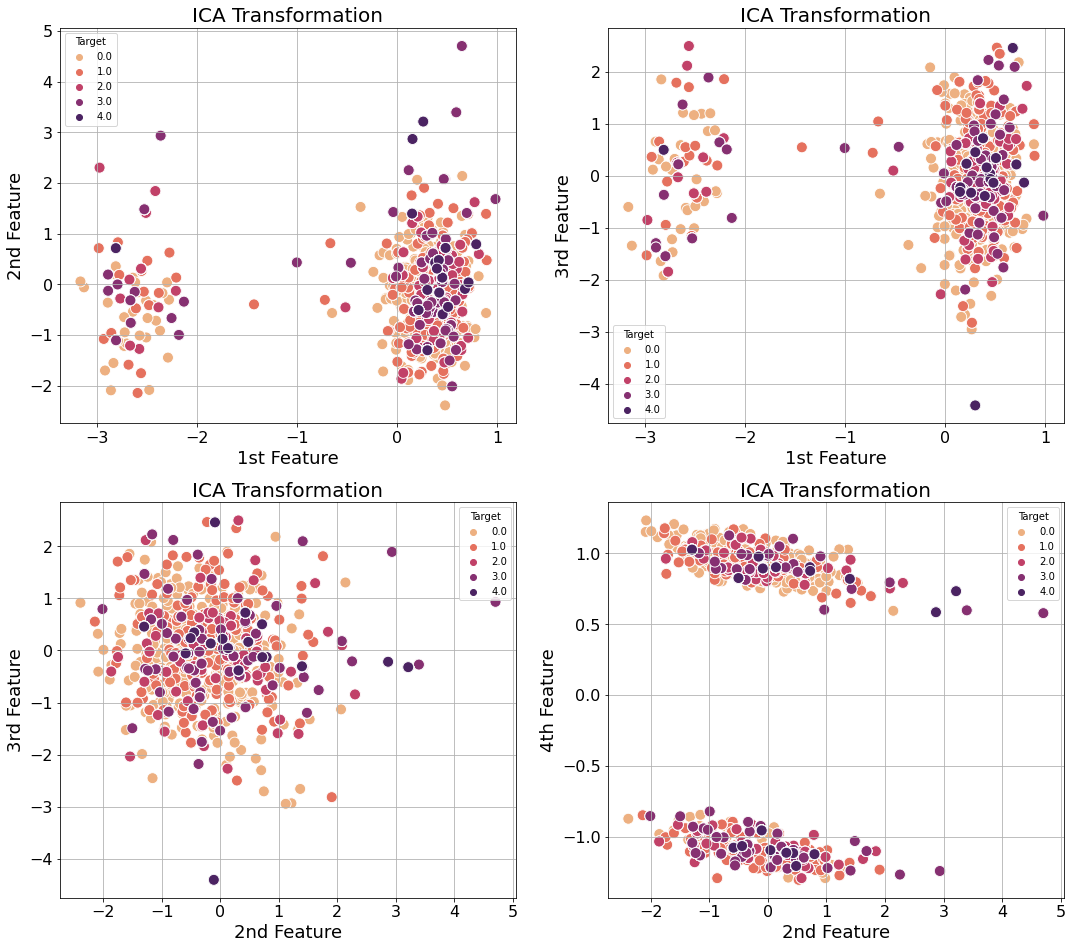

In [16]:
df = pd.DataFrame(data = np.hstack([ICA_data_up, heart_up.num.values.reshape(-1,1)]))
col_names = ['feature_'+str(i) for i in range(ICA_data_up.shape[1])] + ['Target']
df.columns = col_names

fig, axis = plt.subplots(2,2,figsize=(18,16))

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_1', hue = 'Target', s = 120, ax = axis[0,0], palette = 'flare')
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('2nd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_2', hue = 'Target', s = 120, ax = axis[0,1],palette = 'flare')
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_2', hue = 'Target', s = 120, ax = axis[1,0],palette = 'flare')
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_3', hue = 'Target', s = 120, ax = axis[1,1],palette = 'flare')
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('4th Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid();

In [17]:
X_original = heart.drop(['num'],axis=1).copy()
Y_original = heart.num.copy()

In [18]:
X_temp, Y_temp = oversample.fit_resample(X_original, Y_original)

In [19]:
number  = 13
transformer = FastICA(n_components = number, random_state = 144, whiten='unit-variance')
ICA_data_smote = transformer.fit_transform(X_temp)

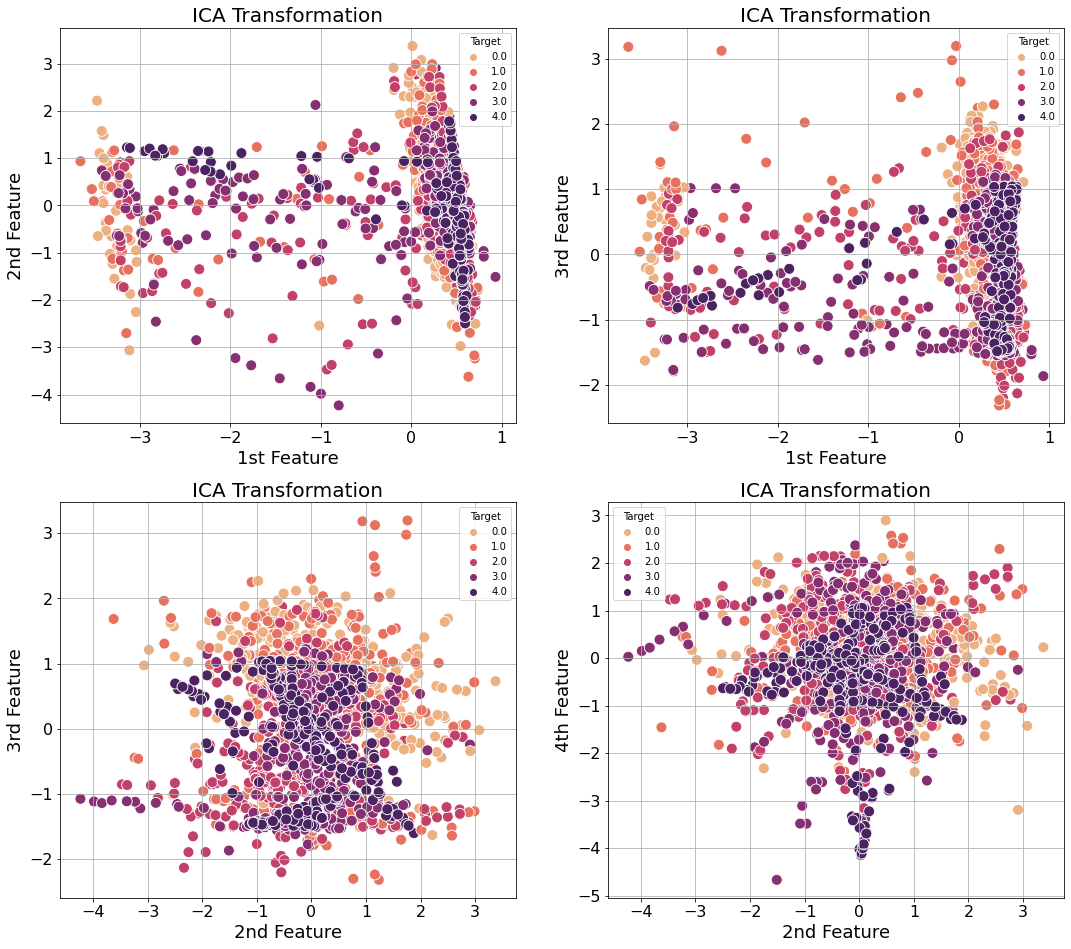

In [20]:
df = pd.DataFrame(data = np.hstack([ICA_data_smote, Y_temp.values.reshape(-1,1)]))
col_names = ['feature_'+str(i) for i in range(ICA_data_up.shape[1])] + ['Target']
df.columns = col_names

fig, axis = plt.subplots(2,2,figsize=(18,16))

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_1', hue = 'Target', s = 120, ax = axis[0,0], palette = 'flare')
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('2nd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_2', hue = 'Target', s = 120, ax = axis[0,1],palette = 'flare')
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_2', hue = 'Target', s = 120, ax = axis[1,0],palette = 'flare')
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_3', hue = 'Target', s = 120, ax = axis[1,1],palette = 'flare')
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('4th Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transformation', fontsize = 20)
av.grid();

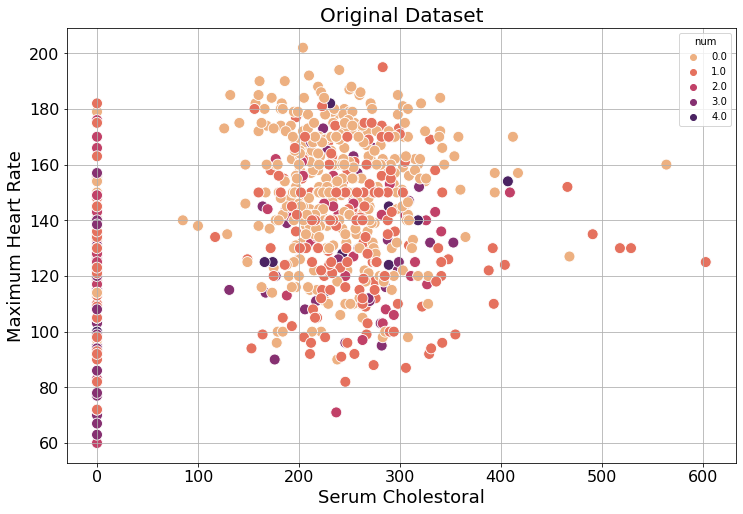

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(data = heart, x = 'chol', y = 'thalach', hue = 'num', palette='flare', s = 120)

ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Serum Cholestoral', fontsize= 18)
ax.set_ylabel('Maximum Heart Rate', fontsize= 18)
ax.set_title('Original Dataset', fontsize = 20)
ax.grid();

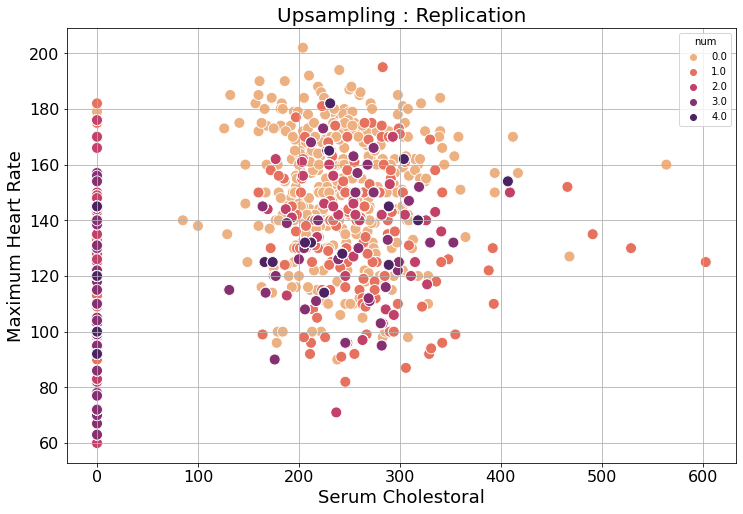

In [22]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(data = heart_up, x = 'chol', y = 'thalach', hue = 'num', palette='flare', s = 120)

ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Serum Cholestoral', fontsize= 18)
ax.set_ylabel('Maximum Heart Rate', fontsize= 18)
ax.set_title('Upsampling : Replication', fontsize = 20)
ax.grid();

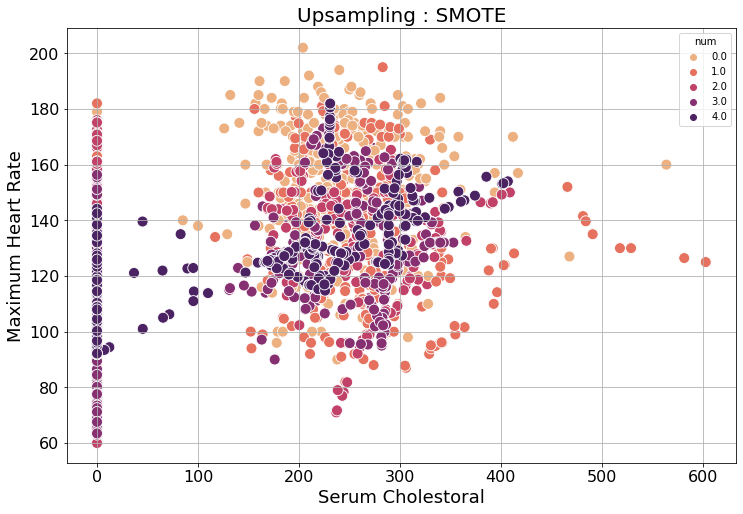

In [23]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
df = pd.concat([X_temp,Y_temp],axis=1)
sns.scatterplot(data = df, x = 'chol', y = 'thalach', hue = 'num', palette='flare', s = 120)

ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Serum Cholestoral', fontsize= 18)
ax.set_ylabel('Maximum Heart Rate', fontsize= 18)
ax.set_title('Upsampling : SMOTE', fontsize = 20)
ax.grid();